<a href="https://colab.research.google.com/github/chiragtyagi2003/wardrobe_classifier/blob/main/wardrobe_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improting Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


Downloading the Dataset

In [2]:
# fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# labels
# 0 => T-shirt/Top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [3]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# explore training data

# 1 => no of samples
# 2,3 => pixel dims
train_images.shape

len(train_labels)

train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# explore test data

test_images.shape

len(test_labels)

test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Data PreProcessing

In [11]:
# preprocess the data
train_images[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

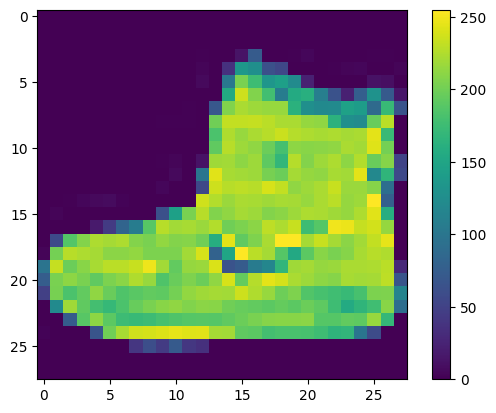

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
# scaling the pixel values
train_images = train_images/255.0
test_images = test_images/255.0

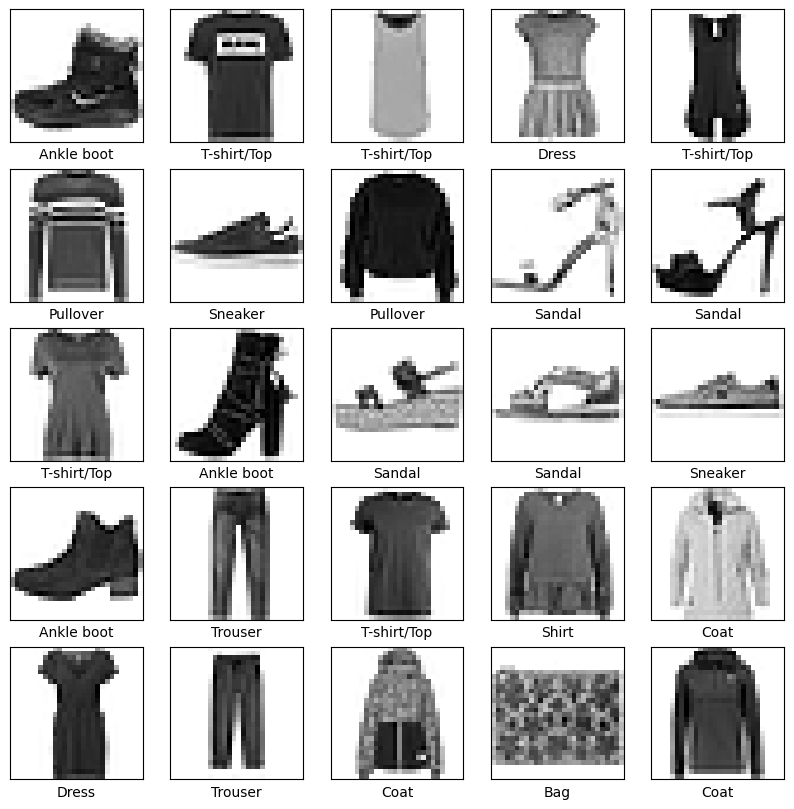

In [17]:
# displaying some images
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

Building the Model

In [19]:
# building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

Compiling the Model

In [20]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

Training the Model

In [21]:
# training the model
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4965 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3738 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3087 - accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2910 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2780 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2650 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2577 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2468 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

Evaluating the Model

In [22]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy ', test_acc)

313/313 - 1s - loss: 0.3376 - accuracy: 0.8833 - 1s/epoch - 4ms/step

Test Accuracy  0.8833000063896179


In [23]:
# making predictions
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [24]:
predictions = prob_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [25]:
predictions[0]

array([5.9763344e-12, 1.2202493e-11, 2.6525163e-10, 1.6075218e-11,
       7.4467781e-13, 3.2393626e-05, 9.3384651e-09, 1.5623596e-03,
       6.4123569e-08, 9.9840516e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [28]:
# function to plot image, with prediction label,accuracy,true label

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# function to plot the bar graph
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Making Predictions using the Model

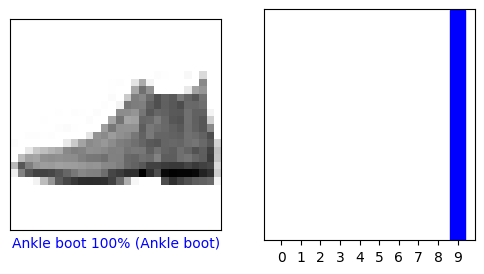

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

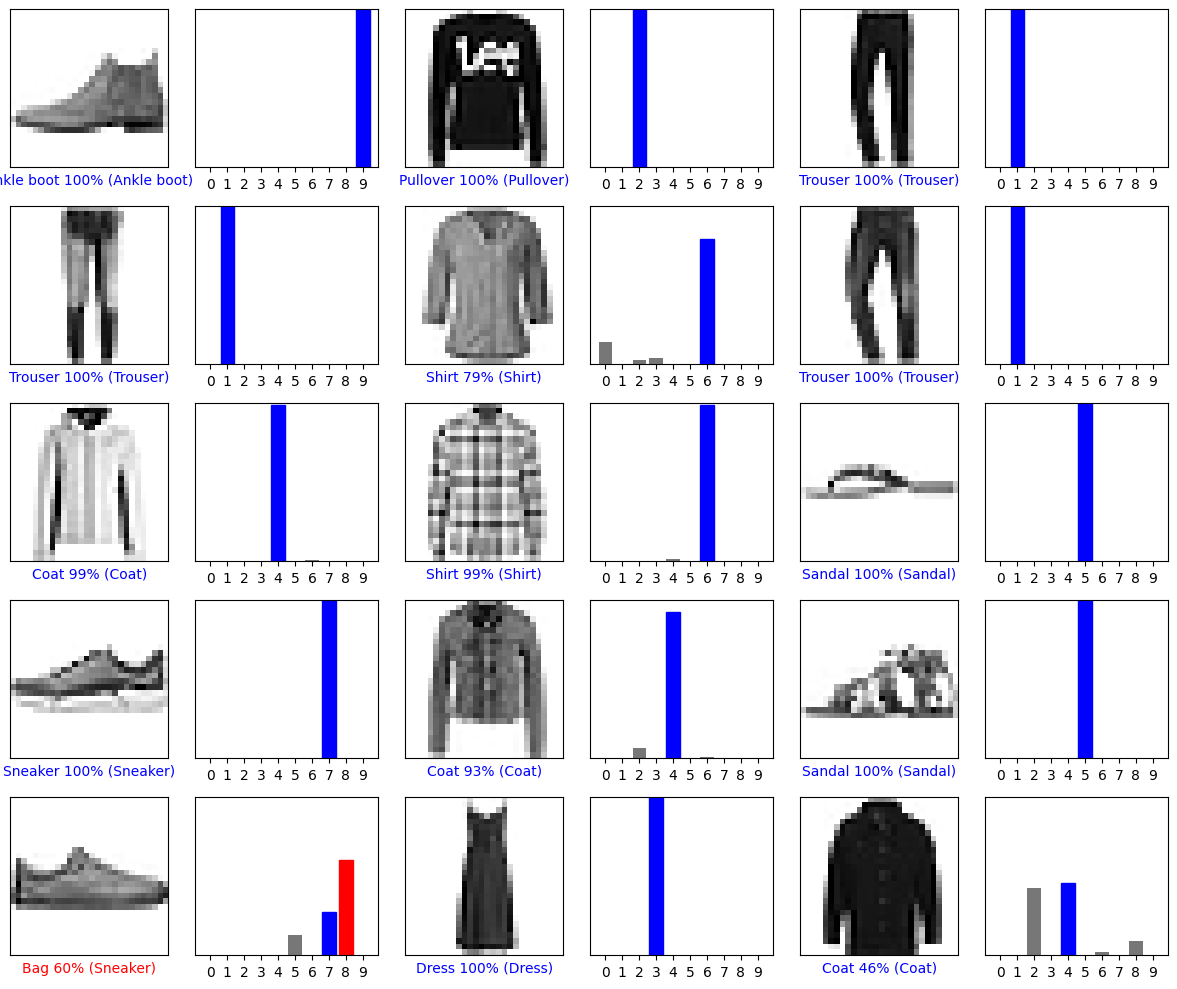

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Prediction for a single image

In [31]:
# using the trained model to make prediction on single image

img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
# keras models make predictions on batches

img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


In [34]:
pred_single = prob_model.predict(img)

print(pred_single)

1/1 [==============================] - 0s 22ms/step
[[8.8928664e-06 3.3565561e-12 9.9686855e-01 5.0970023e-10 2.8062689e-03
  6.5809175e-14 3.1639109e-04 1.3118537e-16 2.9602063e-09 2.4287810e-15]]


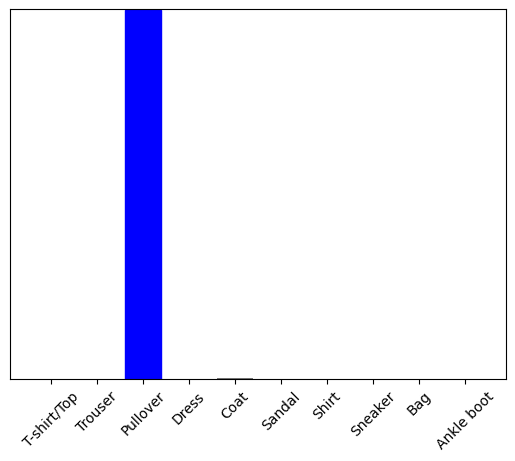

In [36]:
# pred_single is a list of list
# one list for each image of the batch
plot_value_array(1, pred_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [37]:
np.argmax(pred_single[0])

2

In [39]:
class_names[np.argmax(pred_single[0])]

'Pullover'